# LINEAR REGRESSION

Linear regression is an algorithm that provides linear relationship between dependent variable $(y)$ and independent variable $(x)$ to predict the outcome of the future events. This is a one of the statistical method used in data science and machine learning for predictive analysis. 

## Ordinary Least Regression

Ordinary Least Squares regression, often called linear regression, is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable. The OLS method aims to minimize the sum of square differences between the observed and predicted values. Intuitively speaking, the aim of this method is to minimize the prediction error, between the predicted and real values.

In practice, you can use linear regression in many fields:
- meteorology, if you need to predict temperature or rainfall based on external factors.
- biology, if you need to predict the number of remaining individuals in a species depending on the number of predators or life resources.
- economy, if you need to predict a company’s turnover based on the amount of sale and many more.

The assumptions of Ordinary Least Squares:

1) Individuals (observations) are independent.
2) Variance is homogeneous. 
3) Residuals follow a normal distribution.

Model residuals (or errors) are the distances between data points and the fitted model. Model residuals represent the part of variability in the data the model was unable to capture. (www.xlstat.com)

Assumptions : 
-  Linearity : the easiest way to know if the relationship between two variables is linear is to plot the choosen independent variable against dependent variable on a scatterplot. If the data point from a pattern looks like a straight line, then a linear regression model is suitable. If not, we can use some method to fix it, such as a non-linear regression, exponential transformation and log transformation.
-  Non endogeneity :  It refers to the prohibition of a link between the independent variable and the errors. $$ \sigma_{x, \varepsilon} = 0 : \forall\ x,\varepsilon $$
Omitted variable bias occurs when you forget to include a variable. This is reflected in the error term as the factor you forgot about is included in the error. In this way, the error is not random but includes a systematic part (the omitted variable).
-  Normality and homoscedasticity :  $$ \varepsilon \sim \mathcal{N}(0, \, \sigma^2) $$
Considered error is normally distributed. Homoscedasticity means that the error have same varians. Homoscedasticity dataset imply that for smaller values of the independent and dependent variables, we would have a better prediction than a bigger values. To prevent homoscedasticity, we can look for (ovb, outliers, log transformation).
- No autocorrelation (no serial correlation) : $$ \sigma_{\varepsilon_{i}\varepsilon_{j}} = 0 : \forall \, i \neq j $$

Autocorrelation is not observed in cross-sectional data. You usually spot it at time series data, which is a subset of panel data. Sample data is not relevant for this question. 

Alternative for time series dataset:
a. Autoregressive model
b. Moving average model
c. Autoregressive moving average model
d. Autoregressive integrated moving average model

- No multicollinearity : $$ \rho_{{x_i}{x_j}} = 1, \forall \, i,j; \, i \neq j $$
  To fix it (drop one of the two variables, transform them into one variable, or keep them both). Try to find the correlation between each two pairs of independent variables).

The aim of this project is to create linear regression which predicts linear regression based on the SAT score obtained.

### Simple Linear Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() #overwrite the styles and the graphics of all matplotlib graphs

In [18]:
import os
working_directory = os.getcwd()
#print(working_directory)

In [151]:
path = working_directory + '/1.01. Simple linear regression.csv'

In [152]:
data = pd.read_csv(path)
data.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


These are scores of SAT and GPA of student in one of college in USA. The SAT is a standardized test widely used for college admissions in the United States. The GPA, or Grade Point Average, is a number that indicates how high you scored in your courses on average. 

We want to know if the SAT students's score have an effect to their GPA's score. Note: SAT = Critical reading + Mathematics + Writing. So, we will create a linear regression which predicts GPA based on the SAT score obtained.

Hypothesis:
$$ H_0 : \beta = 0 $$ 

In [153]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Number of observation (students) = 84 

Here, we predict GPA with SAT because SAT is considered one of the best estimators of intelectual capacity and capability. In US, they are using SAT as a proxy of admission. Besides, SAT stood the test of time. 

Remember : 
$$
\hat{y} = b_0 + b_1x_1
$$

Define the dependent and independent variables

In [154]:
y = data['GPA']
x1 = data['SAT']

Now, we need to plot the data to be comprehensible and to see if there is a relationship between two variables.

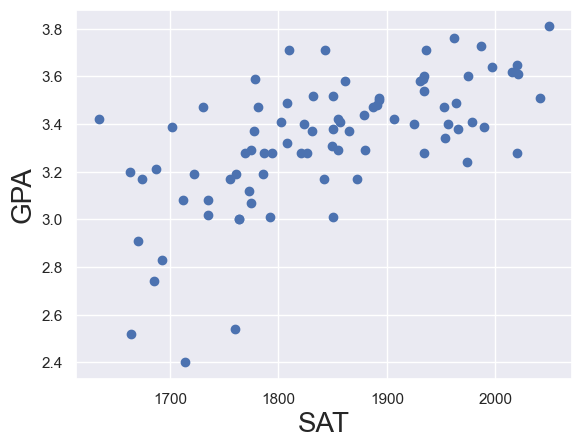

In [155]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Each point on the graph represents different student. Observing all data points, we can see that there is a strong relationship between SAT and GPA. The higher the SAT of the student, the higher their GPA.

As in the documentation, an intercept is not included by default and should be added by the user. Since the $x_0$ is 1 (see equation linear regression) then we can use this code. 

In [156]:
x = sm.add_constant(x1)

In [157]:
# This is the result of using linear regression on dataset
model_linear = sm.OLS(y,x).fit() #fit() will apply a specific estimation technique (OLS in this case) to obtain the fit of the model.
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        09:02:15   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Equation for $b_0$ and $b_1$:
$$
\hat{y} = b_0 + b_1x
$$

$$
b_1 = \dfrac {\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{x})}{(x_i - \bar{x})^2}
$$

$$
b_0 = \bar{y} - b_1 \bar{x}
$$


$$
\hat{y} = 0.2750 + 0.0017x
$$

$$
GPA = 0.2750 + 0.0017 \cdot SAT
$$

The standard error shows the accuracy of prediction for each variables. The lower the standard error, the better the estimate.

$b_0$ : Coefficient of the intercept, sometime we refer to this variable as constant or bias (as it ‘corrects’ the regression equation with a constant value)

$b_1$ : Coefficient of the independent variable i: $b_i$; this is usually the most important metric – it shows us the
relative/absolute contribution of each independent variable of our model

$R^2$ : Variability of the data, explained by the regression model Range: [0;1]. $R^2 = 0$ means your regression explains none of the variability, $R^2 = 1$ means your regression explains the entire variability. It mesures the goodness of fit of the model. The R-squared shows how much of the total variability of the dataset is explained by your regression model. This may be expressed as: how well your model fits your data.

$$ R^2 = SSR / SST $$ 

$ R^2 = 0.406 $ SAT scores explain 41% of the variability of the college grades for the sample. It is neither good or bad. But since it is far away for $90%$, we maay conclude that we are missing some important information. Other determinants must be considered. Variables such as gender, income aand marital status.

$Adj R^2$ : Variability of the data, explained by the regression model, considering the number of independent variables Range: <1; could be negative, but a negative number is interpreted as 0. Like the R-squared, the adjusted R-squared measures how well your model fits the data. However, it penalizes the use of variables that are meaningless for the regression. 

P-value for F-statistic; F-statistic evaluates the overall significance of the model (if at least 1 predictor is
significant, F-statistic is also significant)

Hypothesis F-test : 
$$ H_0 : \beta_1 = \beta_2 = ... = \beta_k = 0  $$
$$ H_1 : \textrm{at least one}\ \beta_i \neq 0 $$ 

The lower the F-statistic, the closer to a non-significant model. 

P-value of t-statistic; The t-statistic of a coefficient shows if the corresponding independent variable is significant or no.

We want p-value less than 0.05 so that a coefficient to be statistically significant

Total variability = Explained variability + Unexplained variablity 

$$ SST = SSR + SSE $$

$$ \sum_{i=1}^n (y_i - \bar{y})^2 = \sum_{i=1}^n (\hat{y_i} - \bar{y})^2 + \sum_{i=1}^n e_i^2$$ 

SST measures the total variability of the data set.
SSR measures the explained variability by your line. 
SSE measures the unexplained variablity by the regression.

Note:
lower error, better the explanatory power.

We plot regression line on the same scatter plot

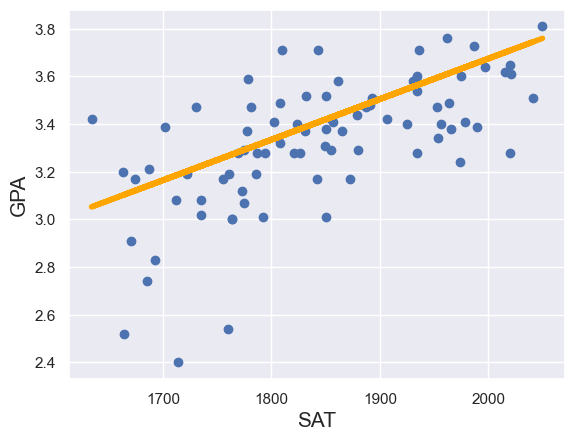

In [158]:
plt.scatter(x1,y)
y_hat = 0.0017*x1 + 0.2750
fig = plt.plot(x1, y_hat, lw = 4, c = "orange", label = "Regression Linear")
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
plt.show()

If we want to know the predictive value of GPA for the value SAT 1700, then 
GPA = 0.2750 + 0.0017 * 1700

In [159]:
GPA = 0.2750 + 0.0017 * 1700
GPA

3.1649999999999996

That is the predictive power of the linear regressions. 

### Multiple Linear Regression

This time is not about the line of regression because the dimension is not two anymore. It is about the best fitting model. 

$$
\hat{y} = b_0 + b_ix_i
$$

In [160]:
path2 = working_directory + '/1.02. Multiple linear regression.csv'
data2 = pd.read_csv(path2)
data2.head(5)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [161]:
data2.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [162]:
y = data2 ['GPA']
x1 = data2 [['SAT','Rand 1,2,3']]

In [163]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           6.58e-10
Time:                        09:02:15   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For random 1,2, and 3, we can not reject the null hypothesis at 76% significance level. Since we want p-value less than 0.05 so that a coefficient to be statistically significant, the variable of random 1,2, and 3 should be dropped all together from data. The bias of the variabels is reflected into the coefficients of the other variables.

## Dealing with categorical data - dummy variables

Dummy : imitation of categorics with numbers 

In [20]:
path3 = working_directory + '/1.03. Dummies.csv'
data3 = pd.read_csv(path3)
data3.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [165]:
data3.shape

(84, 3)

In [166]:
data_dummy = data3.copy()

In [167]:
data_dummy['Attendance'] = data_dummy['Attendance'].map({'Yes':1, 'No':0})

In [168]:
data_dummy

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [169]:
data_dummy.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


The mean of attendance more than 75% lesson is 46%. The fact that the mean < 0.5 shows that there are more 0s than 1s. It implies there are 46% of the students have attended more than 75% of the lesson.

### Regression model of dummy dataset

In [184]:
y = data_dummy[['GPA']]
x1 = data_dummy[['SAT','Attendance']]

In [187]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()

In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.19e-15
Time:                        09:07:18   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our overall model, dummmy and SAT are significants. Adj. R-squared = 0.555 which is a great improvement from what we got without attendance. 

GPA model without dummy variables :
$$
GPA = 0.2750 + 0.0017 \cdot SAT
$$

GPA model with dummy variables :
$$
GPA = 0.6439 + 0.0014 \cdot SAT + 0.2226 \cdot Attendance
$$

If Attendance = 0 then :
$$
GPA = 0.6439 + 0.0014 \cdot SAT + 0.2226 \cdot 0
$$

$$
GPA = 0.6439 + 0.0014 \cdot SAT
$$

If Attendance = 1 then :
$$
GPA = 0.6439 + 0.0014 \cdot SAT + 0.2226 \cdot 1
$$

$$
GPA = 0.8665 + 0.0014 \cdot SAT
$$

Plot the regression line(s) on the scatter plot

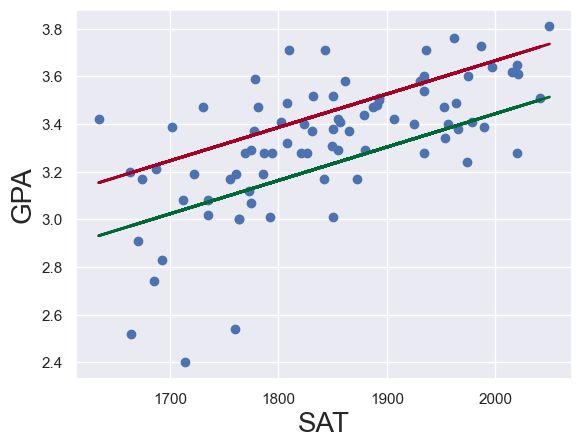

In [197]:
plt.scatter(data_dummy['SAT'],y)
yhat_no = 0.6439 + 0.0014*data_dummy['SAT']
yhat_yes = 0.8665 + 0.0014*data_dummy['SAT']
fig = plt.plot(data_dummy['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data_dummy['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Plot the regression line(s) on the scatter plot and colour the data points

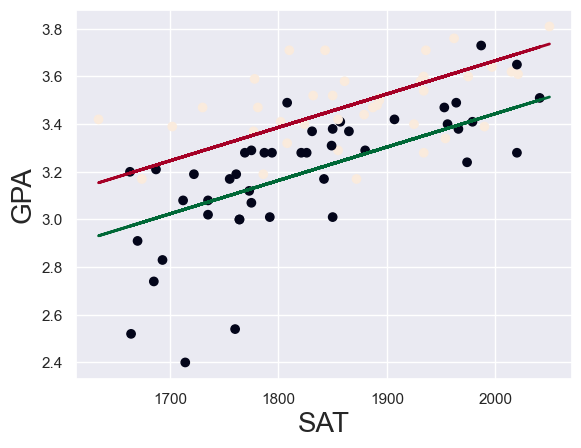

In [198]:
plt.scatter(data_dummy['SAT'],y,  c=data_dummy['Attendance'])
yhat_yes = 0.8665 + 0.0014*data_dummy['SAT']
fig = plt.plot(data_dummy['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data_dummy['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Add the original regression line for comparison

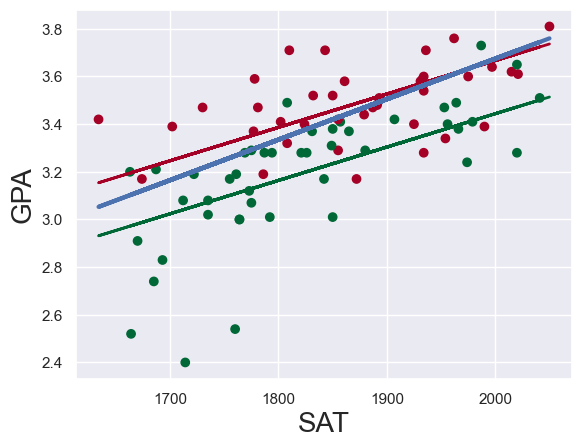

In [199]:
plt.scatter(data_dummy['SAT'],data_dummy['GPA'], c=data_dummy['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data_dummy['SAT']
yhat_yes = 0.8665 + 0.0014*data_dummy['SAT']
yhat = 0.0017*data_dummy['SAT'] + 0.275
fig = plt.plot(data_dummy['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data_dummy['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
fig = plt.plot(data_dummy['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

We have two equations that have the same slope but different intercept. 

red line : regression line with dummmy = 1, green line : regression line with dummy = 0, blue line :  regression line 

## Make predictions based on the regressions we create

In [202]:
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})

In [203]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [204]:
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [205]:
new_data.rename(index={0: 'Bob',1:'Alice'}) 

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [206]:
# Use the predict method on the regression with the new data as a single argument
predictions = model.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [209]:
# we create a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
